# Introduction.
For this project I will be working on the FBI Gun Datasets from the FBI's
National Instant Criminal Background Check System. It is used to determine whether a prospective
buyer is eligible to buy firearms or explosives by Gun shops.I will be analysing the gun data alongside the state level data
## Data Formats
* The NICS data is found in one sheet of an .xlsx file
* The U.S. census data is found in a .csv file. 

The data will be analysed using *pandas* and *numpy*, while *matplolib* used for visualization as imported below

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



The america census data and the gun data were read using the read_csv and read_excel functions respectively

In [2]:
# read the america census data
df_census=pd.read_csv('US_Census_Data.csv')
# read the gun data
df_gundata=pd.read_excel('gun_data.xlsx')
df_gundata.set_index('state',inplace=True)#assign the states to be the index

# The data analysis process
Not necessarily in the strict order but the data underwent the following processes:
* Questions formulation
* Data Wrangling
* Exploratory analysis
* Drawing conclusions
* Communicating results

# Questions the data analysis process seeks to answer:
The analysis seeked to answer the following questions:
1. What is the relation between veteran population and gun ownership?
1. Which gun type is common among the population?
1. Which states have the highest gun ownership in the country?
1. What is the correlation between the povery rates and gun ownership in the respective states in the country?
1. Which state has the highest population density?


# Exploratory data analys
To understand the data sets features and characteristics various processes were carried out. The processes undertaken and its logic are described next to the cells where they are carried out.
Examples of such processes includes:
* Inspect the data using the info() function
* Also print the size of the data shape()
* Check the datatypes for the columns

# Working on the the census datasets
The data census dataset had several structural and quality issues.
Therefore, there was need to preprocess the data before further exploration.

 The dataset was transposed and the feature names assigned so the rows become the columns and viseversa

In [3]:
# the datasets is more intuitive if transposed so the rows become the columns and viseversa
df_census = df_census.transpose()
df_census.columns=df_census.iloc[0]
df_census.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop columns that does not answer any of out question and have null values in most of their rows.
Save it in another dataframe just incase we need it later before dropping

In [4]:
# drop columns that does not answer any of out question and have null values in most of their rows
# lets save it in another dataframe just incase we need it later before dropping
dropped=df_census.iloc[:,66:]

Check the names of the columns that were are about to drop

In [5]:
columnsdropped=[]
for i in dropped.columns:
    columnsdropped.append(i)
columnsdropped

['NOTE: FIPS Code values are enclosed in quotes to ensure leading zeros remain intact.',
 nan,
 'Value Notes',
 '1',
 nan,
 'Fact Notes',
 '(a)',
 '(b)',
 '(c)',
 nan,
 'Value Flags',
 '-',
 'D',
 'F',
 'FN',
 nan,
 'S',
 'X',
 'Z']

In [6]:
df_census=df_census.drop(columnsdropped, axis=1)

# Reformating of the Column names for easy analysis
### The column names are too  lengthy and difficult to work with
Steps to take to make the columns names tidy:
* Remove all the spaces and replace with undescores.
* Convert the names to lower space.
* Remove all the special characters such as '' () ,
* Remvoe the words in parenthesis.
* Remove date and month to remai with just the year on the colum name.


In [7]:
df_census.columns

Index(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

In [8]:
df_census.columns=[col.strip().lower().replace(",","").replace(" ","_").replace("(v2016)","")
                              .replace("july_1_","").replace("april_1_","")
                              .strip('__').replace("__","_") for col in df_census.columns 
]

In [9]:
#drop the first two rows as it is irrelevant to our analysis
df_census.drop(df_census.iloc[0:2].index, inplace=True)
df_census.head(2) # look at the datasets to check the changes applied
    

,population_estimates_2016,population_estimates_base_2010,population_percent_change_-_2010_(estimates_base)_to_2016,population_census_2010,persons_under_5_years_percent_2016,persons_under_5_years_percent_2010,persons_under_18_years_percent_2016,persons_under_18_years_percent_2010,persons_65_years_and_over_percent_2016,persons_65_years_and_over_percent_2010,...,all_firms_2012,men-owned_firms_2012,women-owned_firms_2012,minority-owned_firms_2012,nonminority-owned_firms_2012,veteran-owned_firms_2012,nonveteran-owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010,fips_code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""


### Since the data is a bit tidy now we can now inspect it 
* Using the info() function 
* The size of the data .shape
* Check null values using isnull()
* Check the datatypes using the dtype()

In [10]:
#check the size and shape of the data. dataframe size is 3250
print(df_census.size)
df_census.shape

3250


(50, 65)

In [11]:
#select rows where there are null values
df_census.isnull().sum()

population_estimates_2016                                    0
population_estimates_base_2010                               0
population_percent_change_-_2010_(estimates_base)_to_2016    0
population_census_2010                                       0
persons_under_5_years_percent_2016                           0
                                                            ..
veteran-owned_firms_2012                                     0
nonveteran-owned_firms_2012                                  0
population_per_square_mile_2010                              0
land_area_in_square_miles_2010                               0
fips_code                                                    0
Length: 65, dtype: int64

In [12]:
#check the datatypes
df_census.dtypes

population_estimates_2016                                    object
population_estimates_base_2010                               object
population_percent_change_-_2010_(estimates_base)_to_2016    object
population_census_2010                                       object
persons_under_5_years_percent_2016                           object
                                                              ...  
veteran-owned_firms_2012                                     object
nonveteran-owned_firms_2012                                  object
population_per_square_mile_2010                              object
land_area_in_square_miles_2010                               object
fips_code                                                    object
Length: 65, dtype: object

All values are strings and since they store numerical values they should be converted to floats or integers.
On trying to apply the astype() function we get an error since we have non numerical characters in the dataframe.
Therefore, characters such as % , should be removed

In [13]:

for i in df_census.columns:   
    df_census[i]=(df_census[i].str.replace(",","").replace('"','').replace('Z','0').str.strip('"').replace('D','').replace('FN','').str.strip('$'))
    # The 'persons_in_poverty_percent' column has both percentage and rate values
    # To convert all cells to rate, select those in percentage and divide by 100
    mask= df_census[i].str.contains('%')
    df_census.loc[mask,i]=df_census.loc[mask,i].str.strip('%').astype(float).div(100)
    
df_census.head(2)
    

,population_estimates_2016,population_estimates_base_2010,population_percent_change_-_2010_(estimates_base)_to_2016,population_census_2010,persons_under_5_years_percent_2016,persons_under_5_years_percent_2010,persons_under_18_years_percent_2016,persons_under_18_years_percent_2010,persons_65_years_and_over_percent_2016,persons_65_years_and_over_percent_2010,...,all_firms_2012,men-owned_firms_2012,women-owned_firms_2012,minority-owned_firms_2012,nonminority-owned_firms_2012,veteran-owned_firms_2012,nonveteran-owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010,fips_code
Alabama,4863300,4780131,0.017,4779736,0.06,0.064,0.226,0.237,0.161,0.138,...,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33,01
Alaska,741894,710249,0.045,710231,0.073,0.076,0.252,0.264,0.104,0.077,...,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95,02


### After removing the non numerical characters we can now do the data conversion
We use try and catch to skip over errors which we can then come back to later

In [15]:
df_census.iloc[1]['total_manufacturers_shipments_2012_($1000)']=0
df_census.iloc[10]['total_manufacturers_shipments_2012_($1000)']=0
df_census.iloc[49]['total_employment_percent_change_2014-2015']=0
df_census_clean=df_census.copy()
for i in df_census.columns:
    try:
        df_census_clean[i]=df_census_clean[i].astype(float)
    except:
        pass

df_census_clean.head()

,population_estimates_2016,population_estimates_base_2010,population_percent_change_-_2010_(estimates_base)_to_2016,population_census_2010,persons_under_5_years_percent_2016,persons_under_5_years_percent_2010,persons_under_18_years_percent_2016,persons_under_18_years_percent_2010,persons_65_years_and_over_percent_2016,persons_65_years_and_over_percent_2010,...,all_firms_2012,men-owned_firms_2012,women-owned_firms_2012,minority-owned_firms_2012,nonminority-owned_firms_2012,veteran-owned_firms_2012,nonveteran-owned_firms_2012,population_per_square_mile_2010,land_area_in_square_miles_2010,fips_code
Alabama,4863300.0,4780131.0,0.017,4779736.0,0.060,0.064,0.226,0.237,0.161,0.138,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,94.4,50645.33,1.0
Alaska,741894.0,710249.0,0.045,710231.0,0.073,0.076,0.252,0.264,0.104,0.077,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,1.2,570640.95,2.0
Arizona,6931071.0,6392301.0,0.084,6392017.0,0.063,0.071,0.235,0.255,0.169,0.138,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,56.3,113594.08,4.0
Arkansas,2988248.0,2916025.0,0.025,2915918.0,0.064,0.068,0.236,0.244,0.163,0.144,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,52035.48,5.0
California,39250017.0,37254522.0,0.054,37253956.0,0.063,0.068,0.232,0.250,0.136,0.114,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,239.1,155779.22,6.0


In [16]:
# give a name to the index column similar to that in the gundata
df_census_clean.index.name='state'

### Check if all the columns are of the right data types

In [17]:
df_census_clean.dtypes.value_counts()

float64    65
dtype: int64

# Now that the population data is a bit clean I can work on gundata
The FBI gun dataset was cleaner so just a few changes were made:
1. Checking for duplicate rows
1. Converting the month column to datetime format
1. Checking for null values 

There were null values within the dataframe and I made the decision to fill the cells with zero(0) so as not to impact the other values. I chose this over filling it with the mean values or dropping the columns all together. This was so as to make the dataset useful even when asking different question relating to the columns with null values.

# Data Exploration
After making the few changes we can now look at the data in order to understand it better using the methods described earlier when working with census datasets.
    

In [18]:
df_gundata.head(3)

,month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
Alabama,2017-09,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
Alaska,2017-09,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
Arizona,2017-09,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394


In [19]:
df_gundata.dtypes.value_counts()

float64    23
int64       2
object      1
dtype: int64

### Identify which columns have the different data types

In [20]:
stringColumns=df_gundata.select_dtypes(include=['object']).columns
intColumns=df_gundata.select_dtypes(include=['int64']).columns
print(stringColumns)
intColumns


Index(['month'], dtype='object')


Index(['multiple', 'totals'], dtype='object')

The month column is in string which is difficult to work with therefore I converted it to datetime type astype() function

In [21]:
df_gundata['month']=df_gundata['month'].astype('datetime64[ns]')


- Check null values in the gun dataset and assess the best way to resolve it
- After checking the null values, since no columns have its all cells null we can replace null cells with zero()
- Second thing to check and resolve is to check for duplicates in the dataset

In [22]:
df_gundata.isnull().sum()

month                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [23]:
df_gundata.fillna(0,inplace=True)

In [24]:
# the datasets has no dublicates
df_gundata.duplicated().sum()

95

In [25]:
#check the size of the dataset
df_gundata.shape

(12485, 26)

In [26]:
# To get a summary of metadata on all the variables represented in the different columns use the 
df_gundata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12485 entries, Alabama to Wyoming
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   permit                     12485 non-null  float64       
 2   permit_recheck             12485 non-null  float64       
 3   handgun                    12485 non-null  float64       
 4   long_gun                   12485 non-null  float64       
 5   other                      12485 non-null  float64       
 6   multiple                   12485 non-null  int64         
 7   admin                      12485 non-null  float64       
 8   prepawn_handgun            12485 non-null  float64       
 9   prepawn_long_gun           12485 non-null  float64       
 10  prepawn_other              12485 non-null  float64       
 11  redemption_handgun         12485 non-null  float64       
 12  r

In [27]:
df_gundata.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,...,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,6401.300441,102.727433,5931.364277,7798.960833,158.798078,268.603364,58.789588,4.076652,6.613696,0.067841,...,0.149379,0.006087,0.005767,3.289868,2.555707,0.226912,0.079696,0.097317,0.019143,21595.725911
std,23731.158830,2756.731662,8614.954626,9307.740581,913.339655,783.185073,604.262697,10.174706,15.395329,0.681467,...,1.710795,0.179790,0.173912,33.987054,25.908792,2.139596,0.663611,0.740136,0.186114,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,857.000000,2063.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,511.000000,0.000000,3046.000000,5114.000000,0.000000,125.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4257.000000,0.000000,7277.000000,10374.000000,89.000000,301.000000,0.000000,3.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


### To be able to answer the question which we have put accrossed we have to select the relevant columns and merge them
The columns relevant to the question in the census datasets are:
* state
* 'population_estimates_2016'
* 'white_alone_percent_2016',
* 'black_or_african_american_alone_percent_2016',
* 'american_indian_and_alaska_native_alone_percent_2016',
* 'asian_alone_percent_2016',
* 'native_hawaiian_and_other_pacific_islander_alone_percent_2016',
* 'two_or_more_races_percent_2016', 'hispanic_or_latino_percent_2016',
* 'white_alone_not_hispanic_or_latino_percent_2016', 
* 'veterans_2011-2015',
* 'persons_in_poverty_percent'
* 'land_area_in_square_miles_2010'

The columns relevant to the question in the gun datasets are:
* state
* 'month', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other',
* 'multiple', 'admin',
* 'totals'

Create a list of columns to be used in the census datasets and also create a list of columns names to be used in the gun datasets


In [28]:
census_cols=['population_estimates_2016',
'white_alone_percent_2016',
'black_or_african_american_alone_percent_2016',
'american_indian_and_alaska_native_alone_percent_2016',
'asian_alone_percent_2016',
'native_hawaiian_and_other_pacific_islander_alone_percent_2016',
'two_or_more_races_percent_2016', 'hispanic_or_latino_percent_2016',
'white_alone_not_hispanic_or_latino_percent_2016',
'veterans_2011-2015',
'persons_in_poverty_percent',
'land_area_in_square_miles_2010']
gun_cols=['month', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other',
'multiple', 'admin',
'totals']

In [29]:
# Select the columns above
census=df_census_clean[census_cols]
guns =df_gundata[gun_cols]

In [30]:
# we then need to group the guns datasets by counties
guns_grouped = guns.groupby('state').sum()

In [31]:
# View the datasets to check the changes applied.
guns_grouped.head(5)

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,totals
state,,,,,,,,
Alabama,1047441.0,749.0,2222037.0,2626029.0,39578.0,105230,32.0,6706079
Alaska,13352.0,22.0,434602.0,572174.0,15970.0,28904,19.0,1137643
Arizona,710509.0,6701.0,1781468.0,1480762.0,56832.0,84979,6643.0,4425714
Arkansas,507951.0,13595.0,965584.0,1663256.0,13053.0,61919,2146.0,3752633
California,6530543.0,0.0,5910880.0,5936770.0,342635.0,207864,16680.0,19014063


In [32]:
census.shape

(50, 12)

# Drawing Conclusions from the Merged Datasets
Analysis were carried out to answer the questions posed in the begining and Findings are communicated in form of graphs and summary statistics.

In [33]:
#Which guns are more popular among the people
gunTypes=guns_grouped[['handgun', 'long_gun', 'other',
'multiple', 'admin']].sum()
gunTypes

handgun     74053083.0
long_gun    97370026.0
other        1982594.0
multiple     3353513.0
admin         733988.0
dtype: float64

Lenght can be an effective way to communicate difference in quantity therefore we gun plot a bargraph to show the number of guns per gun type category.
This can be achieved using the .plot() function

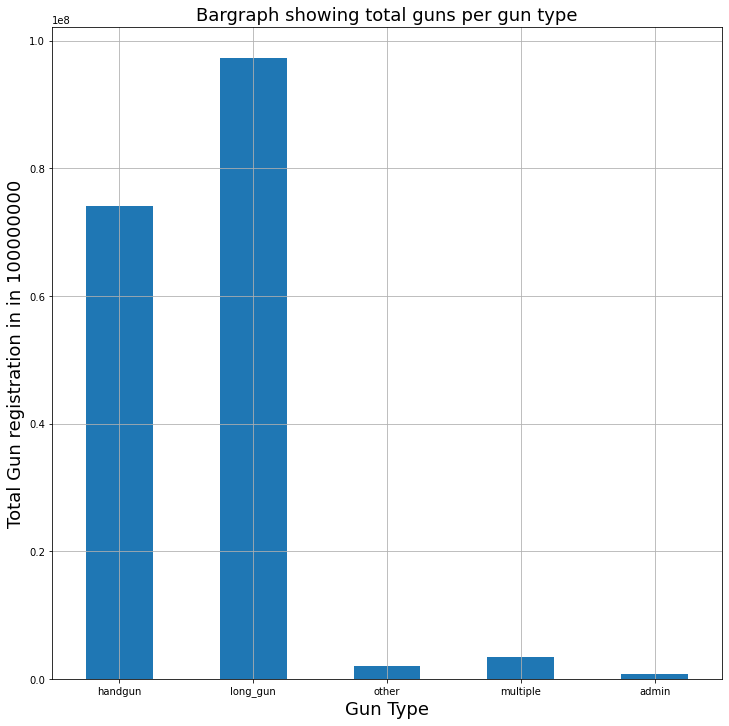

In [34]:
#plot a bar chart to display the above data
gunTypes.plot(kind="bar",figsize=(12,12),rot=0)
plt.title('Bargraph showing total guns per gun type', fontsize=18)
plt.xlabel('Gun Type',fontsize=18)
plt.ylabel('Total Gun registration in in 100000000', fontsize=18)
plt.grid(True)

To answer the question, 'which state has the highest number of gun registration?' max() aggregation function is applied to to the totals column.
Using == will return True where the value on the left is equal to that on the right and False if they are not equal. Hence we can select from the DataFrame the row which returns True

In [35]:
# Which state has the highest number of gun regestration
guns_grouped[guns_grouped['totals']==guns_grouped['totals'].max()]

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,totals
state,,,,,,,,
Kentucky,24926779.0,0.0,1753246.0,2239863.0,19869.0,110439,36986.0,29762434


In [36]:
# To get the statess with the states with the highest number of gun registrations sort them in a descending order
guns_grouped[['permit','totals']].sort_values('totals', ascending=False).head()

,permit,totals
state,,
Kentucky,24926779.0,29762434
Texas,2857582.0,19435186
California,6530543.0,19014063
Illinois,9498639.0,15471534
Pennsylvania,1496008.0,13133876


which is the most densely populated county? Population density is determined by dividing the total area by the total population in that area. A column to hold the resulting dataset is created _census['population_density']_ and the results of the calculation _census['land_area_in_square_miles_2010']/census['population_estimates_2016']_ assigned to it.

In [37]:
# which is the most densely populated county
# dived the area by the total population
census['population_density']= census['land_area_in_square_miles_2010']/census['population_estimates_2016']

/tmp/ipykernel_14910/3841349920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census['population_density']= census['land_area_in_square_miles_2010']/census['population_estimates_2016']


In [38]:
census.sort_values('population_density',ascending=False).head()

,population_estimates_2016,white_alone_percent_2016,black_or_african_american_alone_percent_2016,american_indian_and_alaska_native_alone_percent_2016,asian_alone_percent_2016,native_hawaiian_and_other_pacific_islander_alone_percent_2016,two_or_more_races_percent_2016,hispanic_or_latino_percent_2016,white_alone_not_hispanic_or_latino_percent_2016,veterans_2011-2015,persons_in_poverty_percent,land_area_in_square_miles_2010,population_density
state,,,,,,,,,,,,,
Alaska,741894.0,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612,69323.0,0.099,570640.95,0.769168
Wyoming,585501.0,0.928,0.013,0.027,0.010,0.001,0.021,0.100,0.841,48505.0,0.113,97093.14,0.165829
Montana,1042520.0,0.892,0.006,0.066,0.008,0.001,0.027,0.036,0.865,90000.0,0.133,145545.80,0.139610
North Dakota,757952.0,0.879,0.029,0.055,0.015,0.001,0.021,0.036,0.850,51179.0,0.107,69000.80,0.091036
South Dakota,865454.0,0.852,0.020,0.090,0.015,0.001,0.023,0.037,0.825,63742.0,0.133,75811.00,0.087597


After cleaning the two datasets and we can now merge them to form a dataset which we can use to answer questions effectively.
Analysis can be done on the datasets while they are not merged but for easier analyisi we need to merge them.
This is done using the merge() function in pandas. Our two datasets both have the state column as the index so we set both the right_index and the left_index to true.

In [40]:
merged = census.merge(guns_grouped, left_index=True, right_index=True)

We want to know how states compare to each other  in terms of the number gun permits and the number o veterans. This is done by plotting the two properties in the same bargraph but on the same axes but one on top and the other on lower part of the x-axis

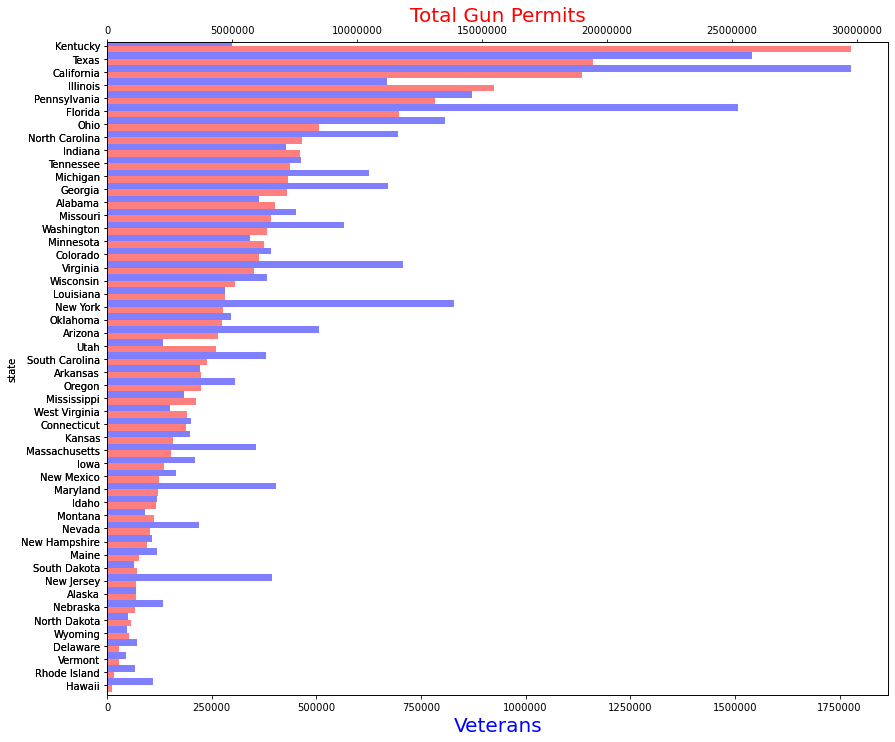

In [41]:
# to sort the rows based on the totals column values
mergedSorted =merged.sort_values(by='totals').copy()
# create the axes
fig, ax = plt.subplots(figsize=[14,8],sharey=True);
mergedSorted['veterans_2011-2015'].plot(kind='barh', figsize=[12,12], label='Vets',color='Blue', alpha=0.5, ax=ax,position=0)

# to create a common axis
ax.set_xlabel('Veterans', color='Blue',fontsize=20);
plt.ticklabel_format(style='plain', axis='x')

# twinned y-axis
ax1 = ax.twiny()
mergedSorted['totals'].plot(kind='barh', figsize=[14,12], label='Guns', alpha=0.5, color='Red',ax=ax1, position=1)
ax1.set_xlabel('Total Gun Permits', color='Red',fontsize=20)

# Create the second plot where ax=ax1
plt.ticklabel_format(style='plain', axis='x')

Using the bargraph as shown above to visualize correlation, the results is hard to understand as it represent too many information in one chart.
A good way of exploring the correlation between the number of veterans and gun ownership will be to use a scatter plot which is esier to read.
This is done using plot() function with kind specified as 'scatter'.
A line of best fit is added to the scatter plot to show the correlation direction and strength using numpy's polyfit() and pandas plot()

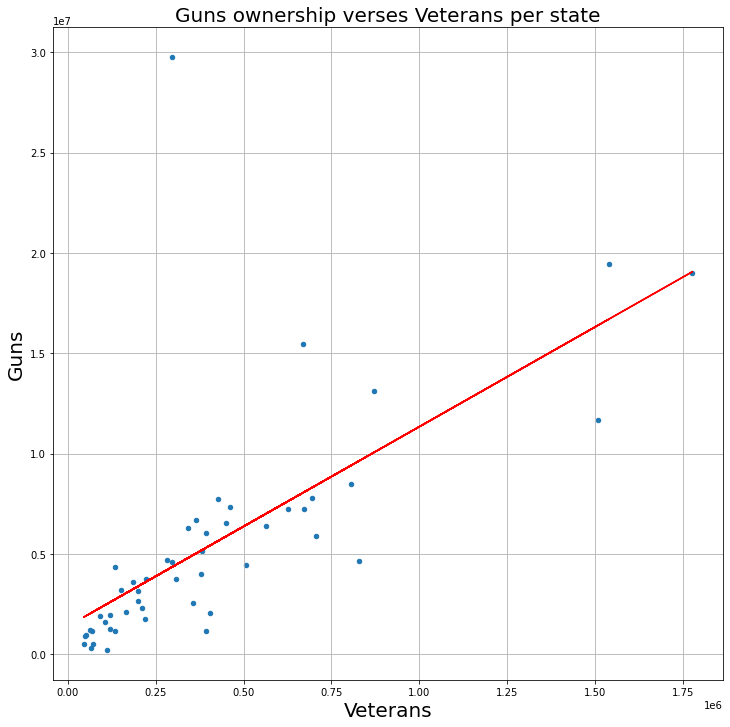

In [42]:
# What is the correlation between the number of veterans and guns
merged.plot(kind='scatter',x='veterans_2011-2015', y='totals',figsize=(12,12))
plt.grid(True)
plt.xlabel('Veterans', fontsize=20)
plt.ylabel('Guns', fontsize=20)
plt.title('Guns ownership verses Veterans per state', fontsize=20)

x=merged['veterans_2011-2015']
y=merged['totals']
a,b= np.polyfit(x,y,1)
plt.plot(x, a*x+b,color='Red')

To determine and visualize the correlation between guns ownership and the level of povety in every state we plot a scatter plot and fit a line of best fit to the data on the scatter plot using plot() and numpy's polyfit() functions

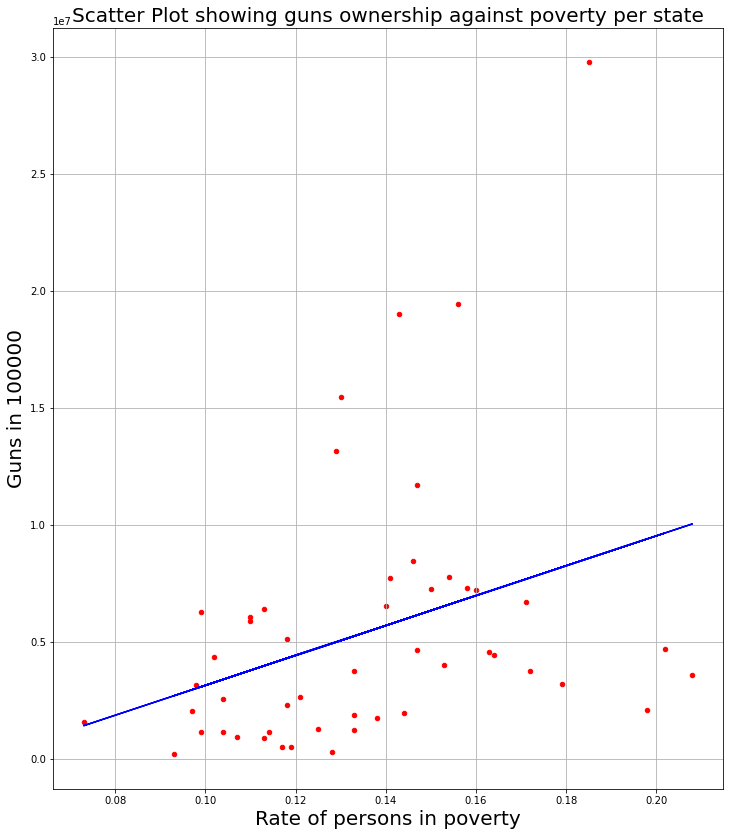

In [43]:
# relationship between gun ownership and porvety levels
merged.plot(kind='scatter', x='persons_in_poverty_percent',y='totals',figsize=(12,14),color='Red')
plt.title('Scatter Plot showing guns ownership against poverty per state',fontsize=20)
plt.xlabel('Rate of persons in poverty', fontsize=20)
plt.ylabel('Guns in 100000',fontsize=20)
plt.grid(True)

x=merged['persons_in_poverty_percent']
y=merged['totals']
a,b=np.polyfit(x,y,1)
plt.plot(x, a*x+b, color='Blue')


# Conclusions
# Questions the data analysis process seeks to answer:
1. _What is the relation between veteran population and gun ownership?_
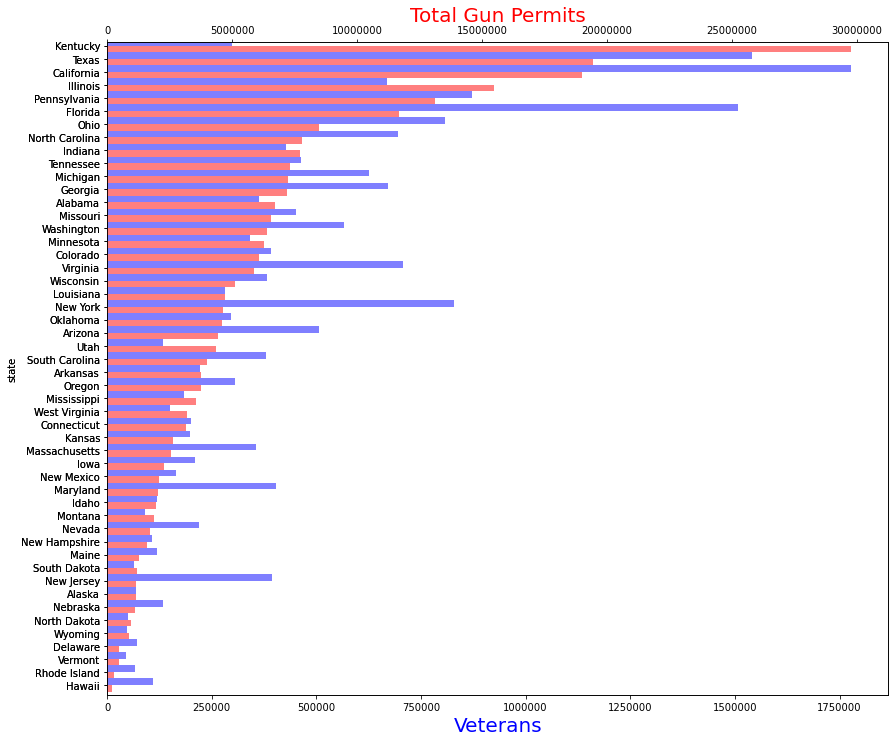
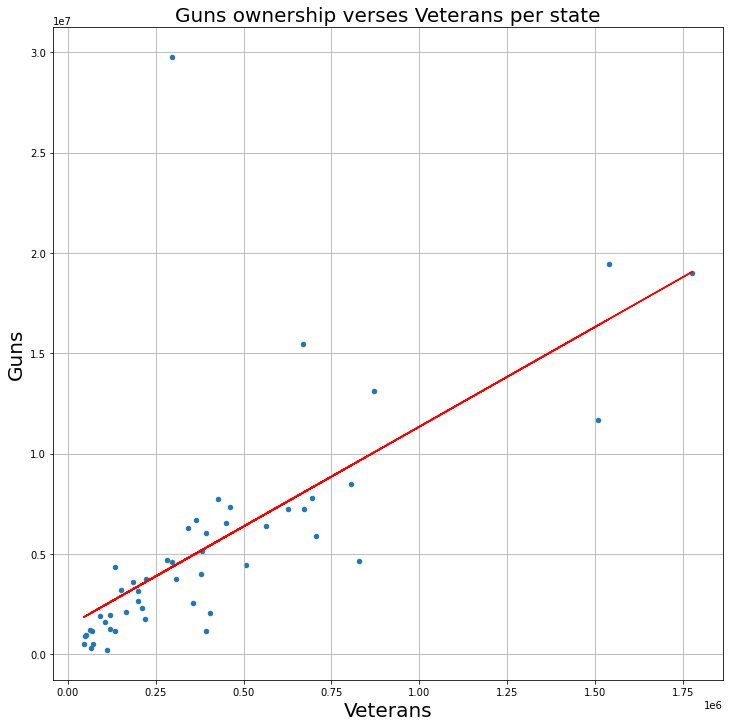
From the analysis it was found that there is a strong positive correlation between the number of veterans per state and the gun ownership rate in the said state

1. _Which states have the highest gun registrations?_
The top states in terms of gun ownership were found to be as follows:
* Kentucky	    
* Texas	        
* California	    
* Illinois	    
* Pennsylvania

1. _Which gun type is common among the population?_
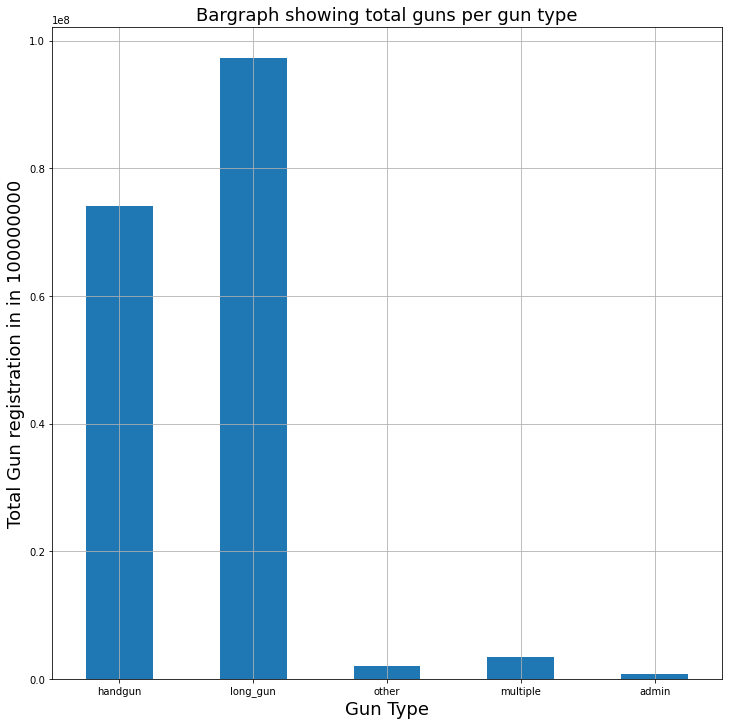
According to the analysis carried out above the most popular gun type among the population accross the stats is *Long gun*

1. _What is the relation between gun ownership and porverty levels?_
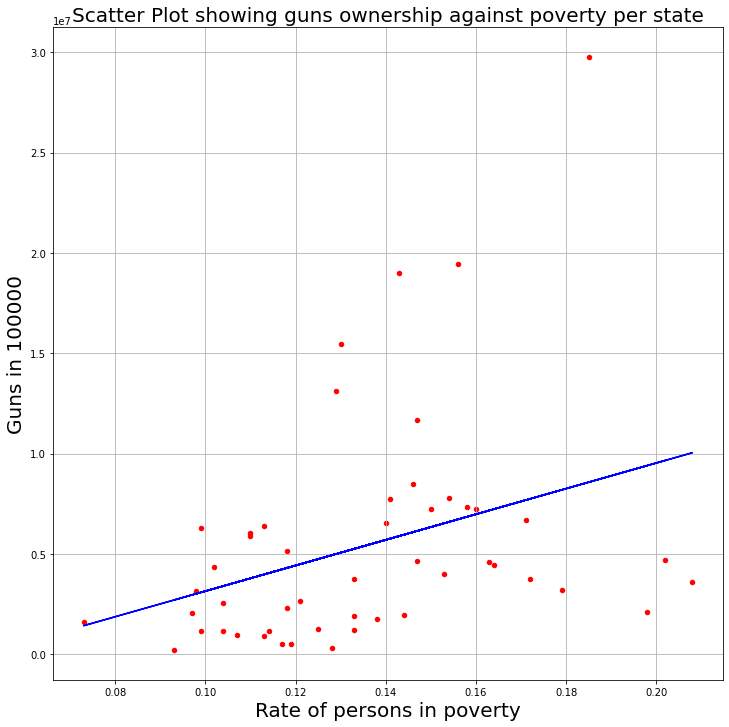
Although not a strong correlation there is a positve correlation between gun ownership and porverty rate in the respective states

1. _which state has the highest population density?_
Arrived at dividing the total population by the area of the state, it was discovered that the state with the highest population density i.e., persons per area square unit is Kentucky



# Challenges
During the Exploration and Analysis of the datasets the following challenges were encountered:
1. Null Values. Where the dataset has null values filling with any of either mean or a zero or empty string may give misleading conlusions later in the analysis
1. Disparity in the two datasets which were to be analysed together. The census datasets had 50 states while the gun datasets had 55 states. While I don't know how that would arise. While merging states that were not on both datasets were dropped, this present a loss information.
1. Visualization of datasets which many features results in a clustered plots. Foreinstance when plotting guns owenership per states resulted in 50 bars which might not be easy to read and understand in the screen of the average computer.

# List of references used
N/A